# Reprojecting & Clipping

In this lesson we will learn how to change the CRS of a `geopandas.GeoDataFrame` and how to clip different geometries using a polygon in a `geopandas.GeoDataFrame`. 
Through doing these operations we will create the following map of roads and populated places in Alaska.

## Data
We will use three datasets in this lesson. 

**First dataset**
The first dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 

We will use the shapefiles for the US states. 
Follow these steps to download shapefile with the United States' states:

1. At the bottom of the [2022 page](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341), under Download, click on "Web Interface"
2. For year, select 2022, and for layer type select "States (and equivalent)". Click submit. 
3. Click on "Download national file".

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 
The columns for this shapefile are:

![Source: TIGER/Line Shapefiles Technical Documentation](/images/tiger_shp_columns.png)

**Second dataset**
The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

**Third dataset**
The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

**Move all datasets to a directory named "data" inside your working directory.**

## Import data

Let's start by loading our libraries and then importing the datasets we'll use.

In [22]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# this is our first time using this function
from shapely.geometry import box

In [23]:
# display all columns when looking at dataframes
pd.set_option("display.max.columns", None)

# ----- IMPORT DATA -----
# states from US Census TIGER files
states = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
# make column names small caps
states.columns = states.columns.str.lower()

# populated places from Natural Earth
places = gpd.read_file('data/ne_50m_populated_places/ne_50m_populated_places.shp')

# roads from Natural Earth
roads = gpd.read_file('data/ne_10m_roads/ne_10m_roads.shp')

## Prepare Alaska polygon

### Exploration

Let's start by taking taking a look at our stats geo-dataframe. 
Since this is a geospatial dataset, exploration should include *at least* checking the head of the dataset, plotting the data, and looking at its CRS.

In [24]:
# print the CRS
print(states.crs)

# look at first five columns
states.head(3)

epsg:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

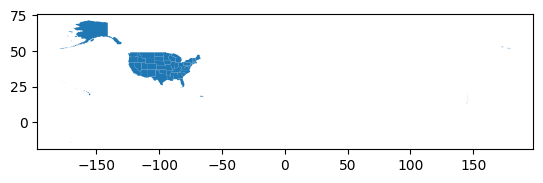

In [25]:
states.plot()

### Selection

For this lesson, we are intersted in plotting data in Alaska. 
Let's start by selecting this data:

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

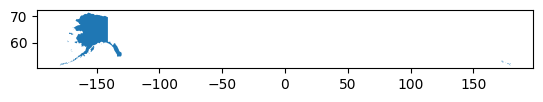

In [26]:
# select Alaska from states
alaska = states[states.name =='Alaska']
alaska.plot()

### Reprojecting

As in our previous lesson, we bump into the issue of Alaska's islands elongating the map. 
To fix this, we will reproject the Alaska geo-dataframe. 
**Reprojecting** means precisely this, changing the coordinate reference system of your geospatial data. 
In our case we will reproject the Alaska geo-dataframe to the CRS EPSG:3338. 
This CRS is a *projected* CRS, better suited for working with data from Alaska:

![Source: [spatialreference.org](https://spatialreference.org/ref/epsg/nad83-alaska-albers/) ](/images/epsg_3338.png)

Changing CRSs in GeoPandas is very simple using the `to_crs()` method for `gpd.GeoDataFrame`s. 
The general syntax is:
```python
updated_geodf = geodf.to_crs(new_crs)
```
where:

- `updated_geodf` is the output of the method, a new geodataframe (`to_crs()` does not work in place), 
- `geodf` is the `gpd.GeoDataFrame` we want to transform, 
- `new_crs` an object of type CRS or string representing the CRS (ex: `'epsg:3338'`), the CRS we want to convert to. 

In our case:

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

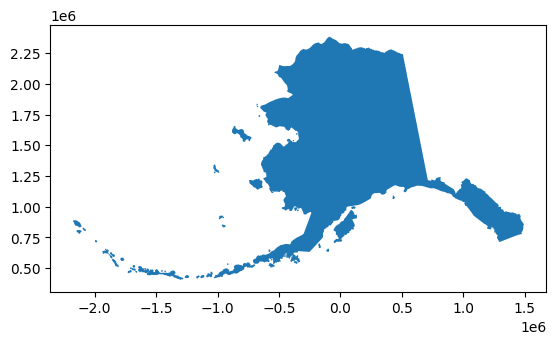

In [27]:
# change to projected CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')
alaska.plot()

In [28]:
# check new CRS
print('is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meters)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Prepare populated places

### Exploration 

Let's now explore the populated places data. 

In [29]:
# print the CRS
print(places.crs)

# look at first five columns
places.head(3)

epsg:4326


,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,NAMEASCII,ADM0CAP,CAPIN,WORLDCITY,MEGACITY,SOV0NAME,SOV_A3,ADM0NAME,ADM0_A3,ADM1NAME,ISO_A2,NOTE,LATITUDE,LONGITUDE,POP_MAX,POP_MIN,POP_OTHER,RANK_MAX,RANK_MIN,MEGANAME,LS_NAME,MAX_POP10,MAX_POP20,MAX_POP50,MAX_POP300,MAX_POP310,MAX_NATSCA,MIN_AREAKM,MAX_AREAKM,MIN_AREAMI,MAX_AREAMI,MIN_PERKM,MAX_PERKM,MIN_PERMI,MAX_PERMI,MIN_BBXMIN,MAX_BBXMIN,MIN_BBXMAX,MAX_BBXMAX,MIN_BBYMIN,MAX_BBYMIN,MIN_BBYMAX,MAX_BBYMAX,MEAN_BBXC,MEAN_BBYC,TIMEZONE,UN_FID,POP1950,POP1955,POP1960,POP1965,POP1970,POP1975,POP1980,POP1985,POP1990,POP1995,POP2000,POP2005,POP2010,POP2015,POP2020,POP2025,POP2050,MIN_ZOOM,WIKIDATAID,WOF_ID,CAPALT,NAME_EN,NAME_DE,NAME_ES,NAME_FR,NAME_PT,NAME_RU,NAME_ZH,LABEL,NAME_AR,NAME_BN,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_SV,NAME_TR,NAME_VI,NE_ID,NAME_FA,NAME_HE,NAME_UK,NAME_UR,NAME_ZHT,GEONAMESID,FCLASS_ISO,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,10,1,5,Admin-1 region capital,Bombo,NaN,NaN,Bombo,0,NaN,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,NaN,0.583299,32.533300,75000,21000,0.0,8,7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q4940747,1141906025,0,Bombo,Bombo,Bombo,Bombo,Bombo,Бомбо,邦博,NaN,بومبو,বোম্বো,Μπόμπο,बॉम्बो,Bombo,Bombo,Bombo,ボンボ,봄보,Bombo,Bombo,Bombo,Bombo,Bombo,1159113923,بمبو,בומבו,Бомбо,بومبو,邦博,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,NaN,NaN,Fort Portal,0,NaN,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,NaN,0.671004,30.275002,42670,42670,0.0,7,7,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Africa/Kampala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q500107,421174009,0,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Форт-Портал,波特爾堡,NaN,فورت بورتال,ফোর্ট পোর্টাল,Φορτ Πορτάλ,फोर्ट पोर्टल,Fort Portal,Fort Portal,Fort Portal,フォート・ポータル,포트포털,Fort Portal,Fort Portal,Fort Portal,Fort Portal,Fort Portal,1159113959,فورت پورتال,פורט פורטל,Форт-Портал,فورٹ پورٹل,波特爾堡,233476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,NaN,NaN,Potenza,0,NaN,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,NaN,40.642002,15.798997,69060,69060,0.0,8,8,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Europe/Rome,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q3543,101752567,0,Potenza,Potenza,Potenza,Potenza,Potenza,Потенца,波坦察,NaN,بوتنسا,পোটেঞ্জা,Ποτέντσα,पोटेंजा,Potenza,Potenza,Potenza,ポテンツァ,포텐차,Potenza,Potenza,Potenza,Potenza,Potenza,1159117259,پوتنزا,פוטנצה,Потенца,پوتینتسا,波坦察,3170027.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (15.79900 40.64200)


<AxesSubplot:>

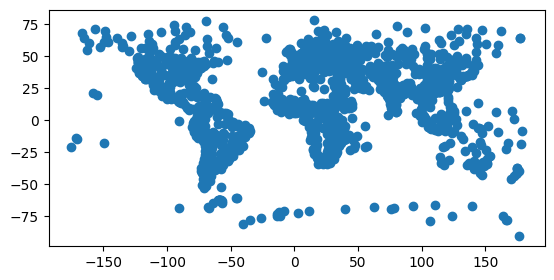

In [30]:
places.plot()

This dataset has CRS EPSG:4326, this is the EPSG code for the WGS84 CRS. 
This is not surprise since this is a global dataset, and EPSG:4326/WGS84 is the most used CRS for such data.

Let's see what happens when we try to plot this data on top of Alaska:

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


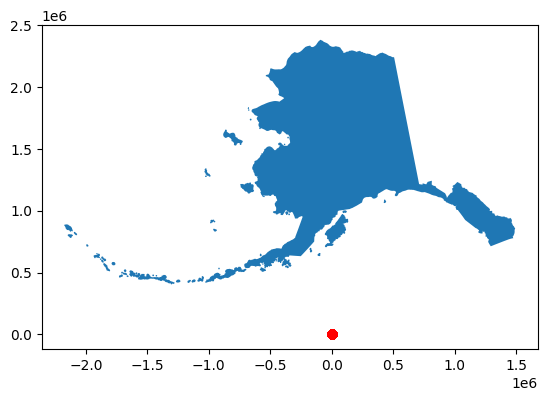

In [31]:
# Trouble
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red')

plt.show()

## Data in weird places? Check your CRSs
This is a classic mistake in  analysis. 
To plot, analyze, or integrate different geospatial datasets they must **have the same CRS**. 

Here, `alaska` and `places` have different CRSs, leading to unexpected results when plotting them together:

In [32]:
print(alaska.crs)
print(places.crs)

epsg:3338
epsg:4326


### Reprojecting

Reprojecting the `places` geo-datafarme into `alaska`'s CRS is simple using `to_crs()`:

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


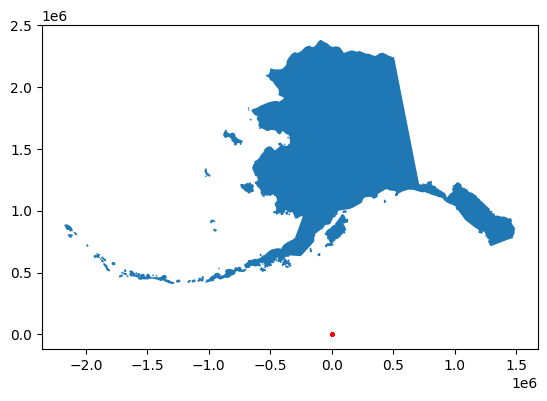

In [33]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red', markersize=2 )

plt.show()

This is better: we can see there is the Alaska poygons and some points on top of it. 
Our next step is to select these points. 

### Clipping

**Clipping** means using a polygon (or polygons) to only select geospatial data within them. 
Clipping a `gpd.GeoDataFrame` is easy using the geopandas [`clip()` function](https://geopandas.org/en/stable/docs/reference/api/geopandas.clip.html). 
The general syntax is:
```python
updated_geodf = gpd.clip(geodf, mask)
```
where:

- `updated_geodf` is the output of the method: the intersection of the geometries in `geodf` with `mask`,
- `geodf` is the `gpd.GeoDataFrame` we want to clip, 
- `mask` is a `gpd.GeoDataFrame` with the polygon(s) we want to use for clipping. This `mask` must be in the same CRS as `geodf`!

In our case:


In [34]:
# clip places to Alaska
ak_places = gpd.clip(places, alaska)
print('Number of places in AK:', len(ak_places))

Number of places in AK: 0


/opt/python/3.7.13/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:3338

  


In [ ]:
# plot populated places in Alaska
fig, ax = plt.subplots()

alaska.plot(ax=ax)
ak_places.plot(ax=ax, color='red')

plt.show()

## Prepare roads 

### Exploration
Now we move on to our roads dataset. 


In [35]:
# print the CRS
print(roads.crs)

# look at first five columns
roads.head(3)

None


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,NaN,"Version 1.5: Changed alignment, a few adds in ...",NaN,NaN,NaN,NaN,0,3,0,ne_1d4_original,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,314705,North America,0,NaN,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,NaN,"Version 1.5: Changed alignment, a few adds in ...",83,NaN,NaN,NaN,0,164,0,ne_1d4_original,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,NaN,"Version 1.5: Changed alignment, a few adds in ...",840,NaN,NaN,NaN,0,98,0,ne_1d4_original,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

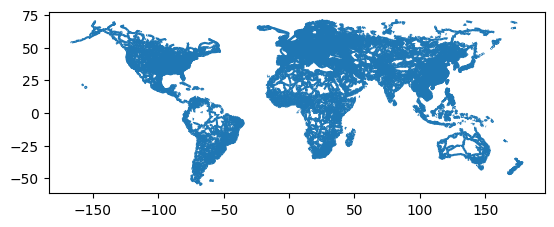

In [36]:
roads.plot()

### One-liner clipping

You may have already noticed that `roads` is not in the same CRS as `alaska`, so these geo-datasets shound't interact until they're in the same CRS. 
Before jumping right into reprojecting and clipping, we will subset the data to select only US roads:

/opt/python/3.7.13/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

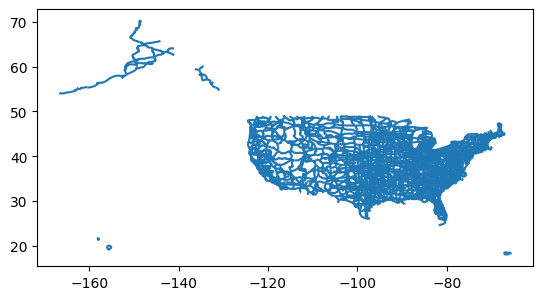

In [37]:
# select US roads only
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

## Reduce your tabular data before reducing via geometries
Geospatial operations are usually costly. 
The more detailed our geometries the longer in takes to do geospatial computations. 
It's a good practice to try to reduce your data as much as possible before applying any geospatial transformation. 

We will now do a "one-liner" to clip `usa_roads` using the `alaska` polygon. Notice we are using the ouput of `usa_roads.to_crs(alaska.crs)` and thus not changing the `usa_roads` geo-dataframe or creating new variables:

In [38]:
# clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs),alaska)

ak_roads.plot()

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

Notice how the lines break on the small islands? 
However in the `usa_roads` there are no broken lines. 
This should make us suspect we are leaving data out and clipping *exactly* to the polygons in `alaska` is not quite what we want. 

### Clipping with bounding box
We will clip the `usa_roads` geo-dataframe with the bounding box of `alaska` instead of its polygons. 
To create a bounding box, we first use the [`box()` function we imported from `shapely.geometry`](https://shapely.readthedocs.io/en/stable/manual.html#shapely.geometry.box). 
The syntax for `box()` is:
```python
box(minx, miny, maxx, maxy)
```
the output is a X representing a box constructed like this:

<!-- INSERT BOX DIAGRAM -->

If we want to create a shapely polygon from the bounds of a geo-dataframe `gdf`, a more straightforward syntax is:
```python 
box(*gdf.total_bounds)
```

<!-- ADD MORE DETAILS ABOUT THIS -->
In our case:


<class 'shapely.geometry.polygon.Polygon'>


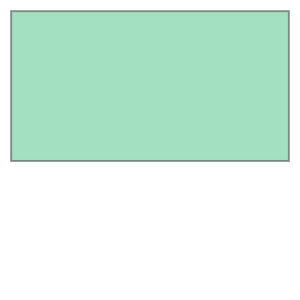

In [39]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

## `*` as unpacking operator
In the last syntax we are using the asterisk `*` as an unpacking operator on the array `gdf.total_bounds`. 
Think about it as unpacking the elements of `gdf.total_bounds` and assigning them one-by-one to the paremeters `minx, miny, maxx, maxy` of `box()`.

This is a good article explaining more about unpacking with `*` in Python:
https://geekflare.com/python-unpacking-operators/

In [40]:
# create geo-dataframe from bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox], # assign geometry column
                           crs = alaska.crs) # assign CRS
print(type(ak_bbox))
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."
